In [184]:
import operator
import itertools

import pandas
import numpy as np

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

%matplotlib inline
import matplotlib.pyplot as plt


def fit_Perceptron(data, target, test_data, rnd):            
    clf = Perceptron(random_state=rnd)
    clf.fit(data, target)    
    predictions = clf.predict(test_data)
    return predictions

data = pandas.read_csv('_f6284c13db83a3074c2b987f714f24f5_svm-data.csv', header=-1)
data.shape

(10, 3)

In [185]:
target = data[0]
features = data[list(xrange(3))[1:]]

In [186]:
target.shape, features.shape

((10,), (10, 2))

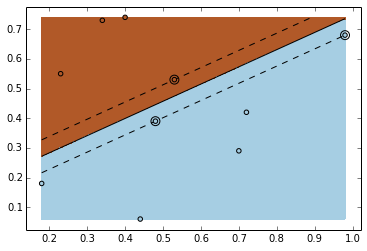

In [187]:
clf = SVC(kernel='linear', C=100000, random_state=241)
clf.fit(features, target)

plt.figure(0)
plt.clf()
plt.scatter(features[1], features[2], c=target, zorder=10, cmap=plt.cm.Paired)


plt.axis('tight')
x_min = features[1].min()
x_max = features[1].max()
y_min = features[2].min()
y_max = features[2].max()


XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

descisions = clf.decision_function(features)

def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

boundary_low = find_nearest(descisions, 0.001)
boundary_high = find_nearest(descisions, -0.001)

arr_bond = []

arr_bond.extend([boundary_low, boundary_high])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-1, 0, 1])

boundaries = features.iloc[clf.support_,:]

plt.scatter(boundaries[1], boundaries[2], s=80, facecolors='none', zorder=10)

In [188]:
ans = np.sort(clf.support_)
ans = map(operator.add, ans, np.repeat(1, len(ans)))
ans = map(str, ans)

In [189]:
with open("ans.txt", 'w') as p:
    p.write(",".join(ans))